# Review

**GOALS**:

- review linear and polynomial regression
- investigate quadratic fit of `mtcars` data

### Regression Review

In practice, we will use `scikitlearn` in a similar fashion across our models.  We have seen the beginning of two important kinds of operations on our data; *transformations* and *model building*.  When we build polynomial features, we are **transforming** our data.  When we fit a `LinearRegression` object, we are **model building**.  We can combine these two operations in a `make_pipeline`, that will first transform, and then fit a model to our transformed data.

Below, we walk through these processes individually to demonstrate what will be happening behind the scenes with larger examples.  

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

### What is Polynomial Regression Doing?

To answer this, let's consider a manufactured noisy quadratic dataset.  The way we will do this is to remember that we have our values $x_i$ and $y_i$.  We also know the relationship will look something like:

$$y = ax^2 + bx + c$$

Our goal is to figure out what $a, b,$ and $c$ are.  We take the same perspective as we did when we had a linear function:

$$y = ax + b$$

when we aimed to minimize the sum of squares as a way of finding these unknown values.  Now however, we need to generate an additional column containing the $x^2$ information.  Remember, these are values that we have.  We are using these data points to predict some other data points that we know in the form of $y_i$.  `PolynomialFeatures` is a way to do this, and it will generate higher degree columns based on existing ones depending on the `degree = ` argument of the method.


Below we will make a small noisy quadratic dataset, fit a linear model to it, generate polynomial features, and fit a model to the transformed data.  

In [3]:
poly = pd.DataFrame({'x': [i  for i in range(10)],
                    'y': [i**2 + np.random.normal()for i in range(10)]})

# There is no Xsquared, just an X.  Y is going to be 1-10 squared plus a small random bit from np.random that adds noise.

In [4]:
poly

,x,y
0,0,-0.805840
1,1,0.132161
2,2,2.923100
3,3,10.461061
4,4,14.738308
5,5,25.068653
6,6,36.238423
7,7,49.969012
8,8,64.574459
9,9,82.384065


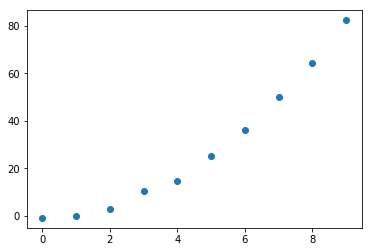

In [5]:
plt.scatter(poly.x, poly.y)

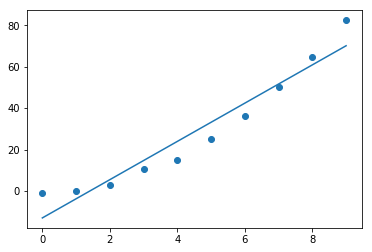

In [6]:
lr = LinearRegression()
lr.fit(poly.x.values.reshape(-1,1), poly.y)
pred = lr.predict(poly.x.values.reshape(-1,1))
plt.scatter(poly.x, poly.y)
plt.plot(poly.x, pred)

#The below shows that a line is not a very good model of this data.

In [7]:
#create a squared feature.  We now have X-sq, X, and C.
poly['x_squared'] = poly.x * poly.x

In [8]:
poly.head()

,x,y,x_squared
0,0,-0.805840,0
1,1,0.132161,1
2,2,2.923100,4
3,3,10.461061,9
4,4,14.738308,16


In [9]:
lr = LinearRegression()
lr.fit(poly[['x', 'x_squared']], poly.y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lr.coef_

array([0.13764365, 1.01009159])

In [11]:
lr.intercept_

-0.8386667826387537

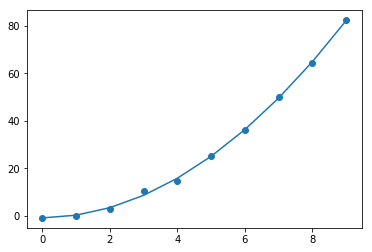

In [12]:
plt.scatter(poly.x, poly.y)
plt.plot(poly.x, lr.predict(poly[['x', 'x_squared']]) )

#  All of the above was us *manually* fitting a polynomial via transformations.  Sicne we're transforming, we could make it the first step of a pipeline. 

### Using `PolynomialFeatures`

Now, we will see how `PolynomialFeatures` accomplishes the same operation.  Further, we can simply pass the `PolynomialFeatures` into a pipeline that includes our modeling step.  Note that the `make_pipeline` object behaves very similar to our earlier `LinearRegression` object.  The elements of the pipeline are accessed in the `named_steps` attributed as demonstrated below.

In [13]:
#polynomial features adds the constant column and squared term
PolynomialFeatures(degree=2).fit_transform(poly.x.values.reshape(-1,1))

# The order is constant, linear, quadratic.  C, b, A.

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.],
       [ 1.,  8., 64.],
       [ 1.,  9., 81.]])

In [14]:
from sklearn.pipeline import make_pipeline 

In [38]:
#read mtcars data
mtcars = pd.read_csv('data/mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


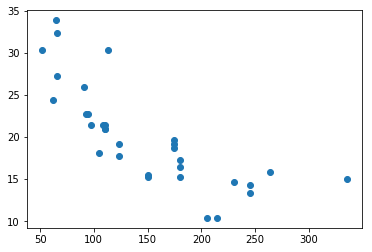

In [16]:
#plot relationship
plt.scatter(mtcars.hp, mtcars.mpg)

In [17]:
#create pipeline that adds polynomial features
#and then fits a LinearRegression model to this
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

#pipelines have transformers and fit method(s).  After we create it, it's just like we instantiated an empty LR model.

In [18]:
#fit the model
pipe.fit(mtcars.hp.values.reshape(-1,1), mtcars.mpg)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [19]:
#investigate named_steps
pipe.named_steps

{'polynomialfeatures': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False),
 'linearregression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)}

In [20]:
#use named_steps to grab coefs
coefs = pipe.named_steps.linearregression.coef_

In [21]:
coefs

array([ 0.        , -0.21330826,  0.00042082])

In [22]:
#make a prediction with pipeline
pred = pipe.predict(mtcars.hp.values.reshape(-1,1))

In [23]:
pred

array([22.03707773, 22.03707773, 24.21108341, 22.03707773, 15.96765036,
       22.65124222, 13.40805167, 28.80162037, 23.94269356, 20.53872089,
       20.53872089, 15.64805681, 15.64805681, 15.64805681, 14.36570074,
       14.00004379, 13.60936421, 28.16384493, 30.45497315, 28.32202634,
       23.67767025, 17.88122987, 17.88122987, 13.40805167, 15.96765036,
       28.16384493, 24.48283978, 21.6786786 , 13.42490269, 15.96765036,
       16.17688413, 22.15822736])

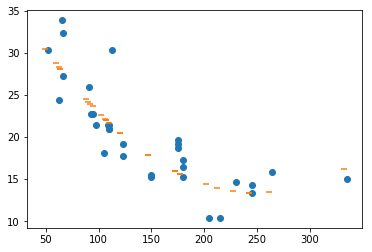

In [27]:
#visualize the results
plt.scatter(mtcars.hp, mtcars.mpg)
plt.scatter(mtcars.hp, pred, marker=0)

## Now we're going to redo the above, but with a test-train split.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(mtcars.hp, mtcars.mpg)

In [30]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [31]:
pipe.fit(X_train.values.reshape(-1,1), y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [32]:
pred = pipe.predict(X_test.values.reshape(-1,1))

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
print("Test RMSE:", np.sqrt(mean_squared_error(pred, y_test)))

Test RMSE: 3.0157028601536813


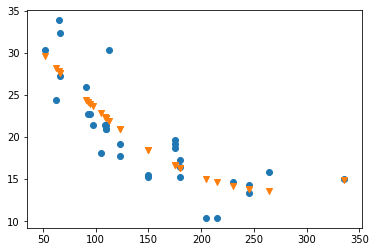

In [37]:
plt.scatter(mtcars.hp, mtcars.mpg)
plt.scatter(mtcars.hp, pipe.predict(mtcars.hp.values.reshape(-1,1)), marker='v')